In [1]:
import sys 

main_path = "c:/Users/sohal/Downloads/CML_Preliminary_Steps-main/CML_Preliminary_Steps-main"
sys.path.append(main_path+"/src") #Code path location

data_path = main_path+"/ICPMS_Data_Compressed/"
sys.path.append(data_path) #Data path lcoation

import train

c:\Users\sohal\anaconda3\envs\cml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rgsohal (ranpo). Use `wandb login --relogin` to force relogin


Setting seed: 1000000


# Single Element ONLY

In [2]:
import torch
torch.cuda.empty_cache()
print(torch.cuda.is_available())

True


### Using Simple LSTM

Available years: [2022 2023 2024]
Chosen year: 2024
465    212238.5
466    246099.1
467    246511.4
468    253558.4
469    227989.0
         ...   
565    164464.2
566    173827.3
567    173114.2
568    161699.5
569    164487.3
Name: Rh103(LR)_AVG, Length: 105, dtype: float64
105 torch.Size([105])
Epoch: 1 | Train Loss:  0.377463 | Validation Loss:  0.190951 | Test Loss:  0.274369 |  Learning rate: 0.001
Epoch: 2 | Train Loss:  0.048896 | Validation Loss:  0.012570 | Test Loss:  0.041705 |  Learning rate: 0.001
Epoch: 3 | Train Loss:  0.021453 | Validation Loss:  0.005961 | Test Loss:  0.027099 |  Learning rate: 0.001
Epoch: 4 | Train Loss:  0.019598 | Validation Loss:  0.009585 | Test Loss:  0.034891 |  Learning rate: 0.001
Epoch: 5 | Train Loss:  0.021267 | Validation Loss:  0.030100 | Test Loss:  0.069409 |  Learning rate: 0.001
Epoch: 6 | Train Loss:  0.021639 | Validation Loss:  0.037777 | Test Loss:  0.080406 |  Learning rate: 0.001
Epoch: 7 | Train Loss:  0.025977 | Validation L

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
learning_rate,████████▄▄▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▂▁▂▃▂▂▃▂▂▁▁▂▂▂▂▂▂▂▁▂▂▂▁▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_loss,█▁▁▁▂▂▁▂▁▁▁▁▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
learning_rate,1e-05
test_loss,0.0323
train_loss,0.01818
validation_loss,0.01258


[Saving model to]: models\SimpleLSTM_969131.pt
MODEL BEING USED: SimpleLSTM_969131.pt
Here are the predictions
182 torch.Size([182])
283 torch.Size([283])
105 torch.Size([105])
Test Loss for year 2022:  0.098397


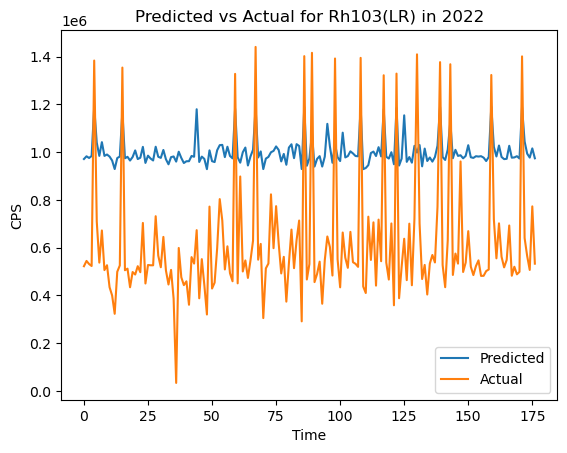

Test Loss for year 2023:  0.084769


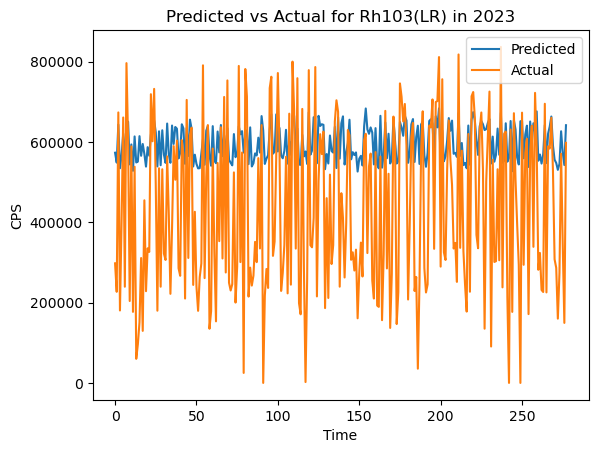

Test Loss for year 2024:  0.019681


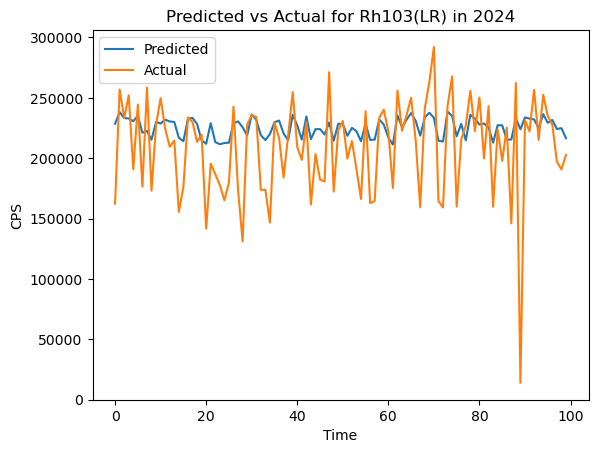

In [3]:
# Define the configuration dictionary
configurations1 = {
    "quantity": 0,                              #quality performance measurement
    "category": "HOT",                          #Options: ["HOT", "COLD"]
    "year": 2024,                               #Specify data year to be used on training
    "all_elements": False,                      #Specify if you want to use all elements or not                              
    "element_name": "Rh103(LR)",                       #Specify the element name if all_elements = False. If all_elements = True, specify None
    "predict_element": "Rh103(LR)",             #Specify the element to be predicted
    "sequence_length": 5,                       #Sequential length for temporal learning
    "hidden_size": 64,                          #Number of hidden states
    "latent_size": 64,                          #IF VAE, Specify the latent size
    "num_layers": 2,                            #Number of LSTM Layers
    "num_epochs": 50,                          #Number of epochs
    "batch_size": 2,                            #Batch size
    "learning_rate": 1e-3,                      #Learning Rate
    "kld_weight": 0.000025,                    #KLD Weight for LSTMVAE to avoid 0 KLD LOSS
    "d_model": 64,                             #Model dimentionality
    "num_heads": 4,                             #Number of heads in the transformer model
    "transformer_num_encoder_layers": 2,        #Number of encoder layers in the transformer model
    "dim_feedforward": 256,                    #Feedforward dimentionality in the transformer model
    "dropout": 0.1,                             #Dropout rate in the transformer model
    "train_size": 0.8,                          #Training size as a fraction of the dataset                       
    "model_type": "SimpleLSTM"                  #Options: ["SimpleLSTM", "LSTMVAE"]
}
train.model_training(configurations1)

### LSTMVAE

Available years: [2022 2023 2024]
Chosen year: 2024
465    212238.5
466    246099.1
467    246511.4
468    253558.4
469    227989.0
         ...   
565    164464.2
566    173827.3
567    173114.2
568    161699.5
569    164487.3
Name: Rh103(LR)_AVG, Length: 105, dtype: float64
105 torch.Size([105])
Epoch: 1 | Train Loss:  0.343427 | Validation Loss:  0.078813 | Test Loss:  0.153713 |  Learning rate: 0.001
Epoch: 2 | Train Loss:  0.032216 | Validation Loss:  0.033553 | Test Loss:  0.069134 |  Learning rate: 0.001
Epoch: 3 | Train Loss:  0.022317 | Validation Loss:  0.007094 | Test Loss:  0.012016 |  Learning rate: 0.001
Epoch: 4 | Train Loss:  0.028777 | Validation Loss:  0.005934 | Test Loss:  0.034348 |  Learning rate: 0.001
Epoch: 5 | Train Loss:  0.022470 | Validation Loss:  0.006913 | Test Loss:  0.040441 |  Learning rate: 0.001
Epoch: 6 | Train Loss:  0.024078 | Validation Loss:  0.010070 | Test Loss:  0.048167 |  Learning rate: 0.001
Epoch: 7 | Train Loss:  0.021831 | Validation L

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
learning_rate,████████████▄▄▄▄▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▄▁▂▃▃▂▂▂▂▂▃▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_loss,█▄▁▁▂▁▁▁▁▁▂▂▁▂▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
learning_rate,6e-05
test_loss,0.00805
train_loss,0.01221
validation_loss,0.00274


[Saving model to]: models\LSTMVAE_91897.pt
MODEL BEING USED: LSTMVAE_91897.pt
Here are the predictions
182 torch.Size([182])
283 torch.Size([283])
105 torch.Size([105])
Test Loss for year 2022:  0.023442


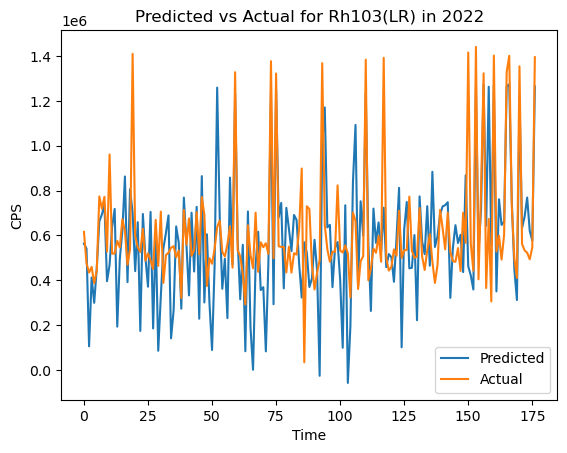

Test Loss for year 2023:  0.027111


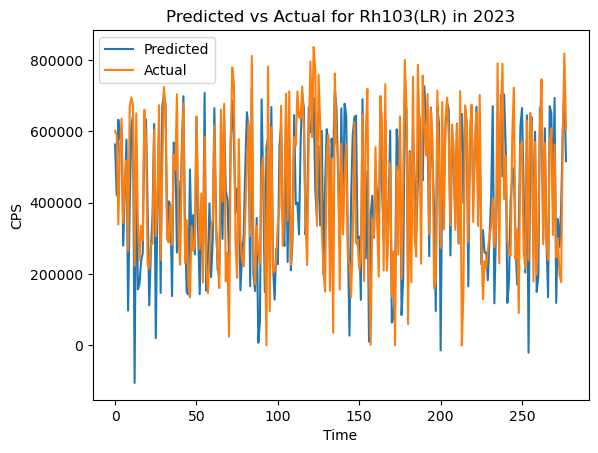

Test Loss for year 2024:  0.009784


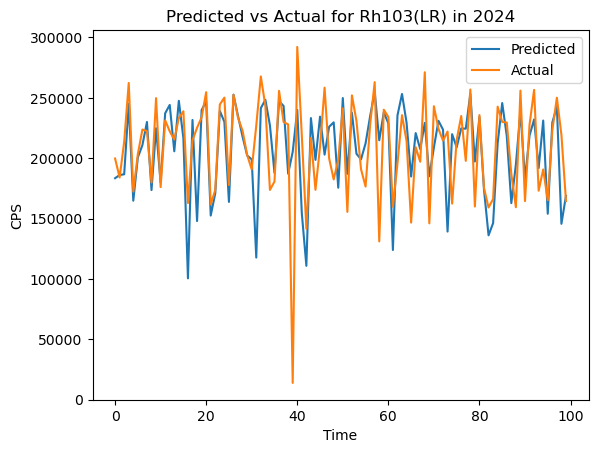

In [4]:
# Define the configuration dictionary
configurations2 = {
    "quantity": 0,                              #quality performance measurement
    "category": "HOT",                          #Options: ["HOT", "COLD"]
    "year": 2024,                               #Specify data year to be used on training
    "all_elements": False,                      #Specify if you want to use all elements or not                              
    "element_name": "Rh103(LR)",                       #Specify the element name if all_elements = False. If all_elements = True, specify None
    "predict_element": "Rh103(LR)",             #Specify the element to be predicted
    "sequence_length": 5,                       #Sequential length for temporal learning
    "hidden_size": 64,                          #Number of hidden states
    "latent_size": 64,                          #IF VAE, Specify the latent size
    "num_layers": 2,                            #Number of LSTM Layers
    "num_epochs": 50,                          #Number of epochs
    "batch_size": 2,                            #Batch size
    "learning_rate": 1e-3,                      #Learning Rate
    "kld_weight": 0.000025,                    #KLD Weight for LSTMVAE to avoid 0 KLD LOSS
    "d_model": 64,                             #Model dimentionality
    "num_heads": 4,                             #Number of heads in the transformer model
    "transformer_num_encoder_layers": 2,        #Number of encoder layers in the transformer model
    "dim_feedforward": 256,                    #Feedforward dimentionality in the transformer model
    "dropout": 0.1,                             #Dropout rate in the transformer model
    "train_size": 0.8,                          #Training size as a fraction of the dataset                       
    "model_type": "LSTMVAE"                  #Options: ["SimpleLSTM", "LSTMVAE"]
}
train.model_training(configurations2)

# Simple Transformer

Available years: [2022 2023 2024]
Chosen year: 2024
465    212238.5
466    246099.1
467    246511.4
468    253558.4
469    227989.0
         ...   
565    164464.2
566    173827.3
567    173114.2
568    161699.5
569    164487.3
Name: Rh103(LR)_AVG, Length: 105, dtype: float64
105 torch.Size([105])


c:\Users\sohal\anaconda3\envs\cml\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch: 1 | Train Loss:  0.073746 | Validation Loss:  0.013322 | Test Loss:  0.042156 |  Learning rate: 0.001
Epoch: 2 | Train Loss:  0.021996 | Validation Loss:  0.014167 | Test Loss:  0.040985 |  Learning rate: 0.001
Epoch: 3 | Train Loss:  0.020766 | Validation Loss:  0.004914 | Test Loss:  0.002969 |  Learning rate: 0.001
Epoch: 4 | Train Loss:  0.028121 | Validation Loss:  0.043372 | Test Loss:  0.090882 |  Learning rate: 0.001
Epoch: 5 | Train Loss:  0.019780 | Validation Loss:  0.017793 | Test Loss:  0.046434 |  Learning rate: 0.001
Epoch: 6 | Train Loss:  0.022247 | Validation Loss:  0.027729 | Test Loss:  0.052082 |  Learning rate: 0.001
Epoch: 7 | Train Loss:  0.018681 | Validation Loss:  0.002339 | Test Loss:  0.007545 |  Learning rate: 0.001
Epoch: 8 | Train Loss:  0.025176 | Validation Loss:  0.003593 | Test Loss:  0.019868 |  Learning rate: 0.001
Epoch: 9 | Train Loss:  0.016428 | Validation Loss:  0.023324 | Test Loss:  0.037379 |  Learning rate: 0.001
Epoch: 10 | Train L

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
learning_rate,███████████████▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
test_loss,▄▄▁█▅▁▂▄▃▁▃▃▂▄▄▂▃▂▂▃▂▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
train_loss,█▂▂▃▂▂▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_loss,▃▃▂█▅▁▁▅▃▁▃▂▁▅▆▂▂▂▂▂▁▂▁▁▂▁▂▂▁▁▁▂▁▁▁▁▁▁▁▁
epoch,49
learning_rate,2e-05
test_loss,0.01198
train_loss,0.01273
validation_loss,0.00364


[Saving model to]: models\Transformer_815657.pt
MODEL BEING USED: Transformer_815657.pt
Here are the predictions
182 torch.Size([182])
283 torch.Size([283])
105 torch.Size([105])
Test Loss for year 2022:  0.087191


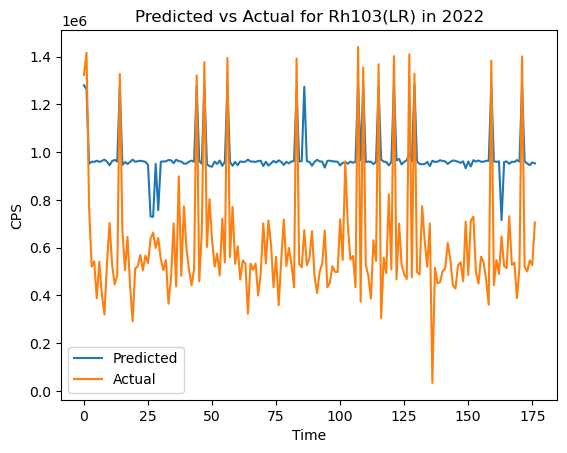

Test Loss for year 2023:  0.081946


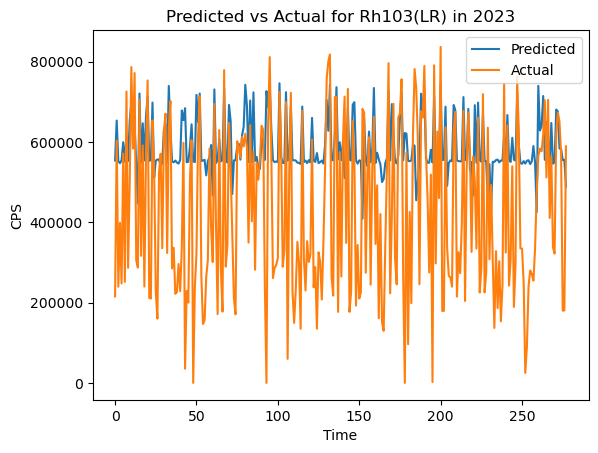

Test Loss for year 2024:  0.011079


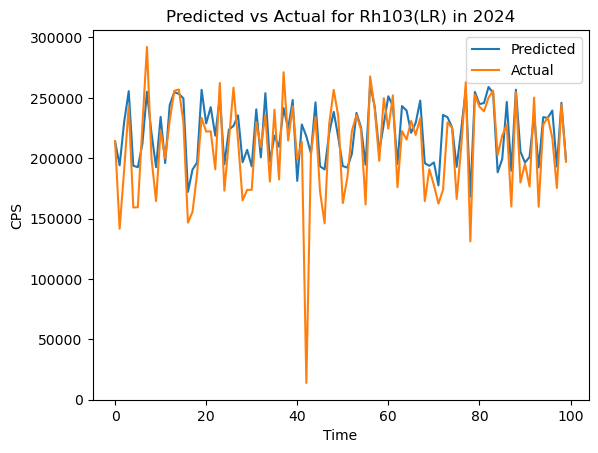

In [5]:
# Define the configuration dictionary
configurations3 = {
    "quantity": 0,                              #quality performance measurement
    "category": "HOT",                          #Options: ["HOT", "COLD"]
    "year": 2024,                               #Specify data year to be used on training
    "all_elements": False,                      #Specify if you want to use all elements or not                              
    "element_name": "Rh103(LR)",                       #Specify the element name if all_elements = False
    "predict_element": "Rh103(LR)",             #Specify the element to be predicted. This should be the same as element_name
    "sequence_length": 5,                       #Sequential length for temporal learning
    "hidden_size": 64,                          #Number of hidden states
    "latent_size": 64,                          #IF VAE, Specify the latent size
    "num_layers": 2,                            #Number of LSTM Layers
    "num_epochs": 50,                          #Number of epochs
    "batch_size": 2,                            #Batch size
    "learning_rate": 1e-3,                      #Learning Rate
    "kld_weight": 0.000025,                    #KLD Weight for LSTMVAE to avoid 0 KLD LOSS
    "train_size": 0.8,                          #Training size as a fraction of the dataset 
    "d_model": 64,                             #Model dimentionality
    "num_heads": 4,                             #Number of heads in the transformer model
    "transformer_num_encoder_layers": 2,        #Number of encoder layers in the transformer model
    "dim_feedforward": 256,                    #Feedforward dimentionality in the transformer model
    "dropout": 0.1,                             #Dropout rate in the transformer model
    "model_type": "Transformer"                  #Options: ["SimpleLSTM", "LSTMVAE"]
}
train.model_training(configurations3)

# Ensemble (Extracted features from LSTMVAE (latent space) + LSTM + Transformer with 1 FCN on last layer)

Available years: [2022 2023 2024]
Chosen year: 2024
465    212238.5
466    246099.1
467    246511.4
468    253558.4
469    227989.0
         ...   
565    164464.2
566    173827.3
567    173114.2
568    161699.5
569    164487.3
Name: Rh103(LR)_AVG, Length: 105, dtype: float64
105 torch.Size([105])
Epoch: 1 | Train Loss:  0.138652 | Validation Loss:  0.184328 | Test Loss:  0.233154 |  Learning rate: 0.001
Epoch: 2 | Train Loss:  0.106304 | Validation Loss:  0.037029 | Test Loss:  0.043853 |  Learning rate: 0.001
Epoch: 3 | Train Loss:  0.093556 | Validation Loss:  0.065804 | Test Loss:  0.085070 |  Learning rate: 0.001
Epoch: 4 | Train Loss:  0.051526 | Validation Loss:  0.025258 | Test Loss:  0.032820 |  Learning rate: 0.001
Epoch: 5 | Train Loss:  0.053547 | Validation Loss:  0.072616 | Test Loss:  0.100861 |  Learning rate: 0.001
Epoch: 6 | Train Loss:  0.045691 | Validation Loss:  0.069251 | Test Loss:  0.127127 |  Learning rate: 0.001
Epoch: 7 | Train Loss:  0.024499 | Validation L

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
learning_rate,███████████▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
test_loss,█▂▃▂▅▂▂▄▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▆▃▃▂▁▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_loss,█▂▃▂▄▁▂▃▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
learning_rate,3e-05
test_loss,0.01084
train_loss,0.01386
validation_loss,0.0047


[Saving model to]: models\Ensemble_150111.pt
MODEL BEING USED: Ensemble_150111.pt
Here are the predictions
182 torch.Size([182])
283 torch.Size([283])
105 torch.Size([105])
Test Loss for year 2022:  0.084167


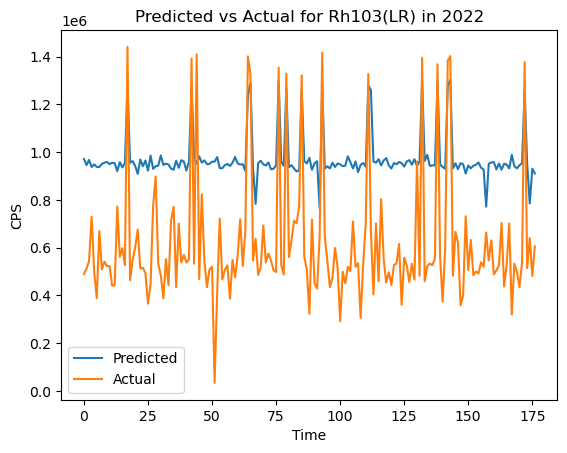

Test Loss for year 2023:  0.079687


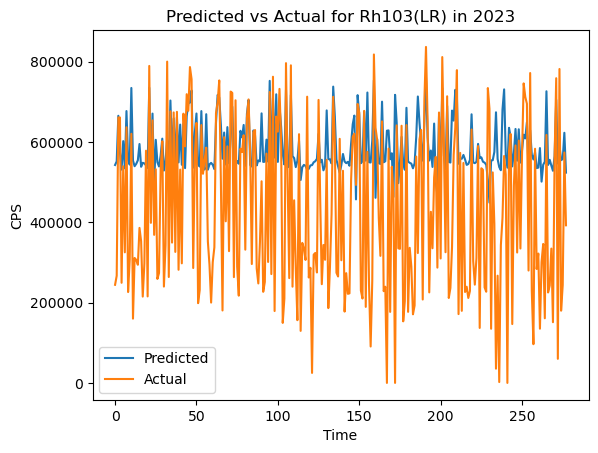

Test Loss for year 2024:  0.010777


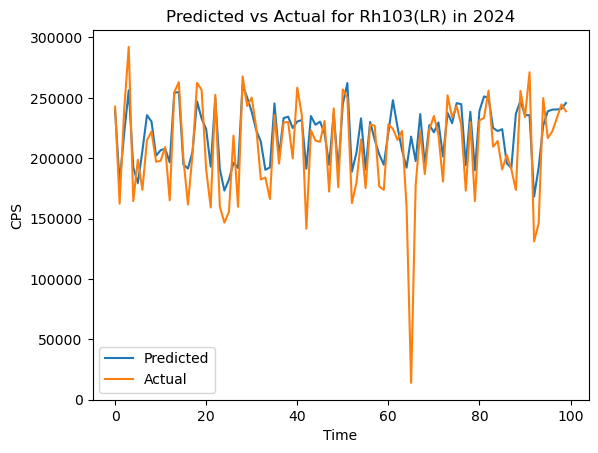

In [6]:
# Define the configuration dictionary
configurations4 = {
    "quantity": 0,                              #quality performance measurement
    "category": "HOT",                          #Options: ["HOT", "COLD"]
    "year": 2024,                               #Specify data year to be used on training
    "all_elements": False,                      #Specify if you want to use all elements or not                              
    "element_name": "Rh103(LR)",                       #Specify the element name if all_elements = False
    "predict_element": "Rh103(LR)",             #Specify the element to be predicted. This should be the same as element_name
    "sequence_length": 5,                       #Sequential length for temporal learning
    "hidden_size": 64,                          #Number of hidden states
    "latent_size": 64,                          #IF VAE, Specify the latent size
    "num_layers": 2,                            #Number of LSTM Layers
    "num_epochs": 50,                          #Number of epochs
    "batch_size": 2,                            #Batch size
    "learning_rate": 1e-3,                      #Learning Rate
    "kld_weight": 0.000025,                    #KLD Weight for LSTMVAE to avoid 0 KLD LOSS
    "train_size": 0.8,                          #Training size as a fraction of the dataset 
    "d_model": 64,                             #Model dimentionality
    "num_heads": 4,                             #Number of heads in the transformer model
    "transformer_num_encoder_layers": 2,        #Number of encoder layers in the transformer model
    "dim_feedforward": 256,                    #Feedforward dimentionality in the transformer model
    "dropout": 0.1,                             #Dropout rate in the transformer model
    "model_type": "Ensemble"                  #Options: ["SimpleLSTM", "LSTMVAE"]
}
train.model_training(configurations4)

# All Elements

### Using Simple LSTM

Available years: [2022 2023 2024]
Chosen year: 2024
     Ge72(MR)_AVG  Co59(MR)_AVG  Mn55(MR)_AVG  Rh103(LR)_AVG  Ce140(MR)_AVG  \
465         173.8           1.4           1.4       212238.5            2.1   
466          22.2           0.0           0.0       246099.1            7.8   
467         171.4           0.0           2.1       246511.4            6.2   
468          52.3           0.0           0.0       253558.4            0.0   
469         145.4           0.0           0.7       227989.0            3.5   
..            ...           ...           ...            ...            ...   
565         163.6           0.0           0.0       164464.2            0.0   
566         116.8           1.4           3.5       173827.3            6.2   
567          39.7           5.6           2.1       173114.2            7.4   
568          26.4          20.3          15.6       161699.5            3.1   
569         148.5           7.6           4.2       164487.3            0.0   


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
learning_rate,████████████▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▅▂▂▁▂▃▃▁▅▄▆▄▆▇▅▅█▅▇▇█▆▇█▇▇██████████████
train_loss,█▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_loss,▂▂▄▂▄▂▄▁▄▃▅▂▅▆▄▄█▃▆▆▇▆▇▇▇▆██▇▇█▇▇▇▇▇▇▇▇▇
epoch,49
learning_rate,2e-05
test_loss,0.03545
train_loss,0.02111
validation_loss,0.16207


[Saving model to]: models\SimpleLSTM_976779.pt
MODEL BEING USED: SimpleLSTM_976779.pt
Here are the predictions
182 torch.Size([182, 22])
283 torch.Size([283, 22])
105 torch.Size([105, 22])
Test Loss for year 2022:  0.036444


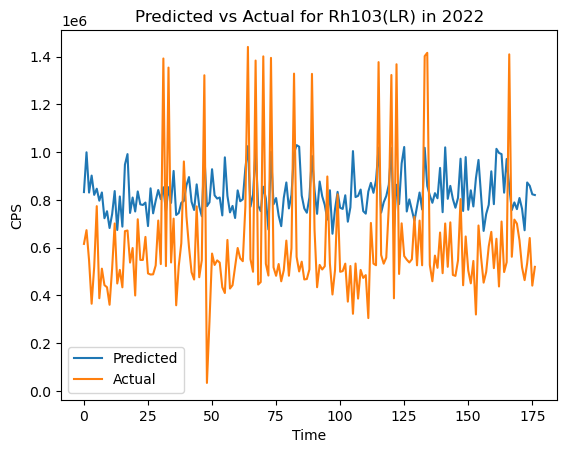

Test Loss for year 2023:  0.029298


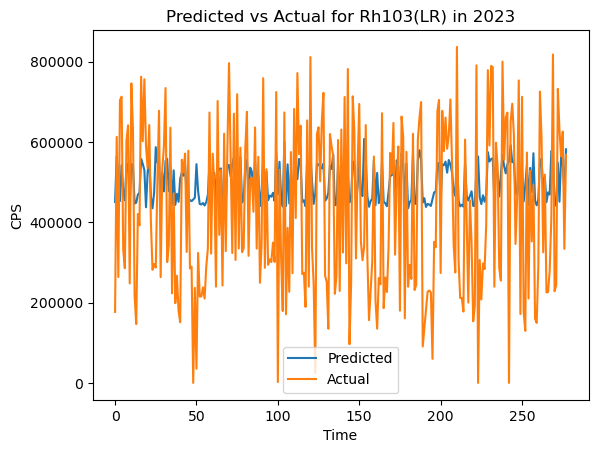

Test Loss for year 2024:  0.026493


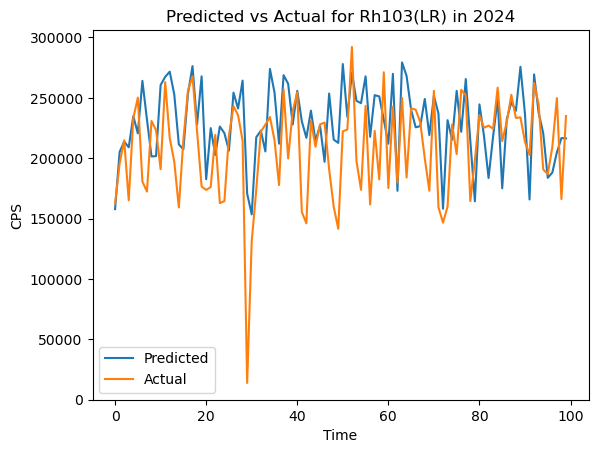

In [7]:
# Define the configuration dictionary
configurations5 = {
    "quantity": 0,                              #quality performance measurement
    "category": "HOT",                          #Options: ["HOT", "COLD"]
    "year": 2024,      
    "all_elements": True,                      #Specify if you want to use all elements or not                              
    "element_name": None,                       #Specify the element name if all_elements = False. If all_elements = True, specify None
    "predict_element": "Rh103(LR)",             #Specify the element to be predicted
    "sequence_length": 5,                       #Sequential length for temporal learning
    "hidden_size": 64,                          #Number of hidden states
    "latent_size": 64,                          #IF VAE, Specify the latent size
    "num_layers": 2,                            #Number of LSTM Layers
    "num_epochs": 50,                          #Number of epochs
    "batch_size": 2,                            #Batch size
    "learning_rate": 1e-3,                      #Learning Rate
    "kld_weight": 0.000025,                    #KLD Weight for LSTMVAE to avoid 0 KLD LOSS
    "d_model": 64,                             #Model dimentionality
    "num_heads": 4,                             #Number of heads in the transformer model
    "transformer_num_encoder_layers": 2,        #Number of encoder layers in the transformer model
    "dim_feedforward": 256,                    #Feedforward dimentionality in the transformer model
    "dropout": 0.1,                             #Dropout rate in the transformer model
    "train_size": 0.8,                          #Training size as a fraction of the dataset                       
    "model_type": "SimpleLSTM"                  #Options: ["SimpleLSTM", "LSTMVAE"]
}
train.model_training(configurations5)

### LSTMVAE

Available years: [2022 2023 2024]
Chosen year: 2024
     Ge72(MR)_AVG  Co59(MR)_AVG  Mn55(MR)_AVG  Rh103(LR)_AVG  Ce140(MR)_AVG  \
465         173.8           1.4           1.4       212238.5            2.1   
466          22.2           0.0           0.0       246099.1            7.8   
467         171.4           0.0           2.1       246511.4            6.2   
468          52.3           0.0           0.0       253558.4            0.0   
469         145.4           0.0           0.7       227989.0            3.5   
..            ...           ...           ...            ...            ...   
565         163.6           0.0           0.0       164464.2            0.0   
566         116.8           1.4           3.5       173827.3            6.2   
567          39.7           5.6           2.1       173114.2            7.4   
568          26.4          20.3          15.6       161699.5            3.1   
569         148.5           7.6           4.2       164487.3            0.0   


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
learning_rate,████████████▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
test_loss,█▃▃▂▂▃▁▃▃▅▁▁▅▃▄▃▅▄▅▃▄▃▃▄▄▃▄▃▄▄▄▄▄▄▄▄▅▄▄▄
train_loss,█▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_loss,▅█▄█▃▃▃▃▄▄▃▃▂▃▄▁▁▁▃▁▂▂▂▄▂▂▂▄▂▂▃▂▃▄▄▂▄▂▄▂
epoch,49
learning_rate,3e-05
test_loss,0.02776
train_loss,0.02269
validation_loss,0.13195


[Saving model to]: models\LSTMVAE_44516.pt
MODEL BEING USED: LSTMVAE_44516.pt
Here are the predictions
182 torch.Size([182, 22])
283 torch.Size([283, 22])
105 torch.Size([105, 22])
Test Loss for year 2022:  0.034087


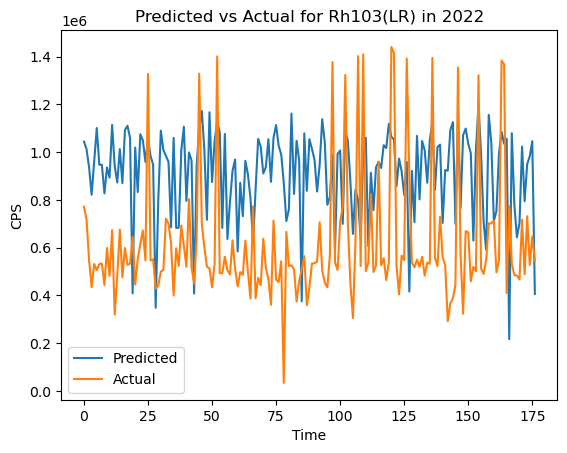

Test Loss for year 2023:  0.029149


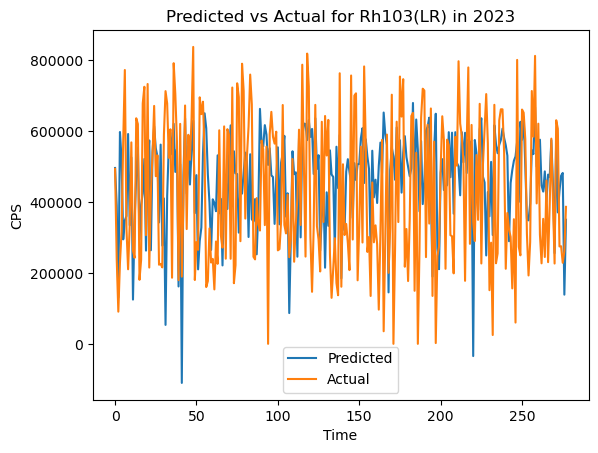

Test Loss for year 2024:  0.023929


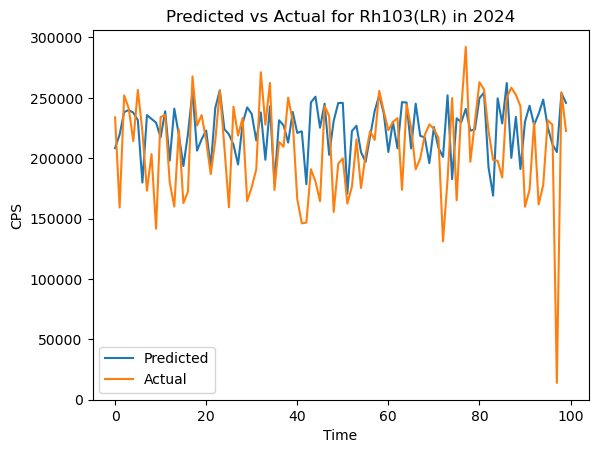

In [8]:
# Define the configuration dictionary
configurations6 = {
    "quantity": 0,                              #quality performance measurement
    "category": "HOT",                          #Options: ["HOT", "COLD"]
    "year": 2024,                               #Specify data year to be used on training
    "all_elements": True,                      #Specify if you want to use all elements or not                              
    "element_name": None,                       #Specify the element name if all_elements = False. If all_elements = True, specify None
    "predict_element": "Rh103(LR)",             #Specify the element to be predicted
    "sequence_length": 5,                       #Sequential length for temporal learning
    "hidden_size": 64,                          #Number of hidden states
    "latent_size": 64,                          #IF VAE, Specify the latent size
    "num_layers": 2,                            #Number of LSTM Layers
    "num_epochs": 50,                          #Number of epochs
    "batch_size": 2,                            #Batch size
    "learning_rate": 1e-3,                      #Learning Rate
    "kld_weight": 0.000025,                    #KLD Weight for LSTMVAE to avoid 0 KLD LOSS
    "d_model": 64,                             #Model dimentionality
    "num_heads": 4,                             #Number of heads in the transformer model
    "transformer_num_encoder_layers": 2,        #Number of encoder layers in the transformer model
    "dim_feedforward": 256,                    #Feedforward dimentionality in the transformer model
    "dropout": 0.1,                             #Dropout rate in the transformer model
    "train_size": 0.8,                          #Training size as a fraction of the dataset                       
    "model_type": "LSTMVAE"                  #Options: ["SimpleLSTM", "LSTMVAE"]
}
train.model_training(configurations6)

# Transformer

Available years: [2022 2023 2024]
Chosen year: 2024
     Ge72(MR)_AVG  Co59(MR)_AVG  Mn55(MR)_AVG  Rh103(LR)_AVG  Ce140(MR)_AVG  \
465         173.8           1.4           1.4       212238.5            2.1   
466          22.2           0.0           0.0       246099.1            7.8   
467         171.4           0.0           2.1       246511.4            6.2   
468          52.3           0.0           0.0       253558.4            0.0   
469         145.4           0.0           0.7       227989.0            3.5   
..            ...           ...           ...            ...            ...   
565         163.6           0.0           0.0       164464.2            0.0   
566         116.8           1.4           3.5       173827.3            6.2   
567          39.7           5.6           2.1       173114.2            7.4   
568          26.4          20.3          15.6       161699.5            3.1   
569         148.5           7.6           4.2       164487.3            0.0   


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
learning_rate,████████▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▂▂▁▅▁▄▆▁▅▅▃▄▅▅▇▆▇█▇▇▇▇▇▇█▇█▇████▇▇▇█████
train_loss,█▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_loss,▄▃▁▄▆▆▄█▆▄▆▆▇▆█▆▇▇█▇▇▇▇▇█▇██████████████
epoch,49
learning_rate,1e-05
test_loss,0.03905
train_loss,0.00849
validation_loss,0.16722


[Saving model to]: models\Transformer_132965.pt
MODEL BEING USED: Transformer_132965.pt
Here are the predictions
182 torch.Size([182, 22])
283 torch.Size([283, 22])
105 torch.Size([105, 22])
Test Loss for year 2022:  0.046075


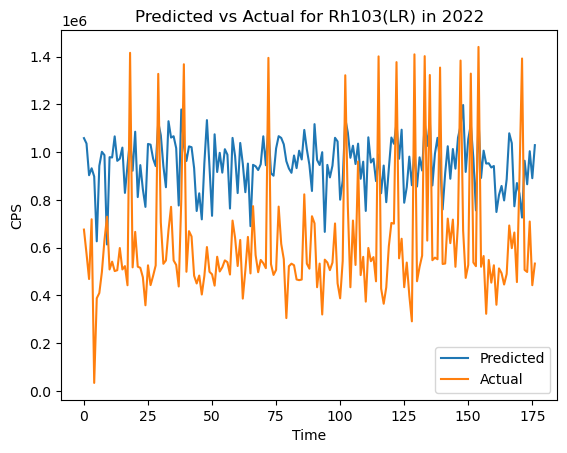

Test Loss for year 2023:  0.041988


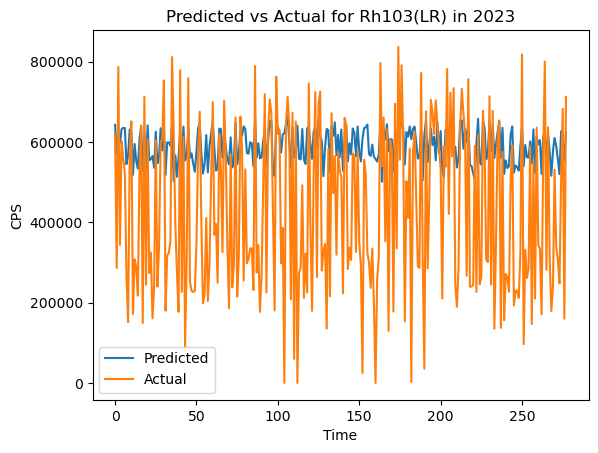

Test Loss for year 2024:  0.021584


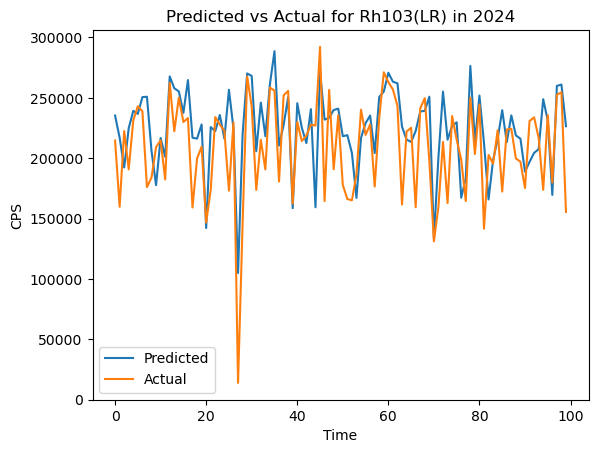

In [9]:
# Define the configuration dictionary
configurations7 = {
    "quantity": 0,                              #quality performance measurement
    "category": "HOT",                          #Options: ["HOT", "COLD"]
    "year": 2024,                               #Specify data year to be used on training
    "all_elements": True,                      #Specify if you want to use all elements or not                              
    "element_name": "Rh103(LR)",                       #Specify the element name if all_elements = False
    "predict_element": "Rh103(LR)",             #Specify the element to be predicted. This should be the same as element_name
    "sequence_length": 5,                       #Sequential length for temporal learning
    "hidden_size": 64,                          #Number of hidden states
    "latent_size": 64,                          #IF VAE, Specify the latent size
    "num_layers": 2,                            #Number of LSTM Layers
    "num_epochs": 50,                          #Number of epochs
    "batch_size": 2,                            #Batch size
    "learning_rate": 1e-3,                      #Learning Rate
    "kld_weight": 0.000025,                    #KLD Weight for LSTMVAE to avoid 0 KLD LOSS
    "train_size": 0.8,                          #Training size as a fraction of the dataset 
    "d_model": 64,                             #Model dimentionality
    "num_heads": 4,                             #Number of heads in the transformer model
    "transformer_num_encoder_layers": 2,        #Number of encoder layers in the transformer model
    "dim_feedforward": 256,                    #Feedforward dimentionality in the transformer model
    "dropout": 0.1,                             #Dropout rate in the transformer model
    "model_type": "Transformer"                  #Options: ["SimpleLSTM", "LSTMVAE"]
}
train.model_training(configurations7)

# Ensemble (Extracted features from LSTMVAE (latent space) + LSTM + Transformer with 1 FCN on last layer)

Available years: [2022 2023 2024]
Chosen year: 2024
     Ge72(MR)_AVG  Co59(MR)_AVG  Mn55(MR)_AVG  Rh103(LR)_AVG  Ce140(MR)_AVG  \
465         173.8           1.4           1.4       212238.5            2.1   
466          22.2           0.0           0.0       246099.1            7.8   
467         171.4           0.0           2.1       246511.4            6.2   
468          52.3           0.0           0.0       253558.4            0.0   
469         145.4           0.0           0.7       227989.0            3.5   
..            ...           ...           ...            ...            ...   
565         163.6           0.0           0.0       164464.2            0.0   
566         116.8           1.4           3.5       173827.3            6.2   
567          39.7           5.6           2.1       173114.2            7.4   
568          26.4          20.3          15.6       161699.5            3.1   
569         148.5           7.6           4.2       164487.3            0.0   


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
learning_rate,███████████▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,█▂▂▂▂▁▂▂▂▁▂▂▂▂▂▃▂▂▂▃▃▃▃▃▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
train_loss,█▅▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_loss,█▂▂▂▁▁▂▂▁▁▁▁▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
epoch,49
learning_rate,1e-05
test_loss,0.05135
train_loss,0.00575
validation_loss,0.1678


[Saving model to]: models\Ensemble_365609.pt
MODEL BEING USED: Ensemble_365609.pt
Here are the predictions
182 torch.Size([182, 22])
283 torch.Size([283, 22])
105 torch.Size([105, 22])
Test Loss for year 2022:  0.053111


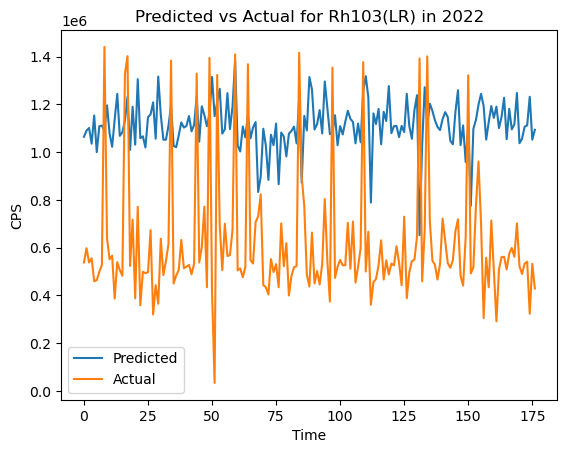

Test Loss for year 2023:  0.045361


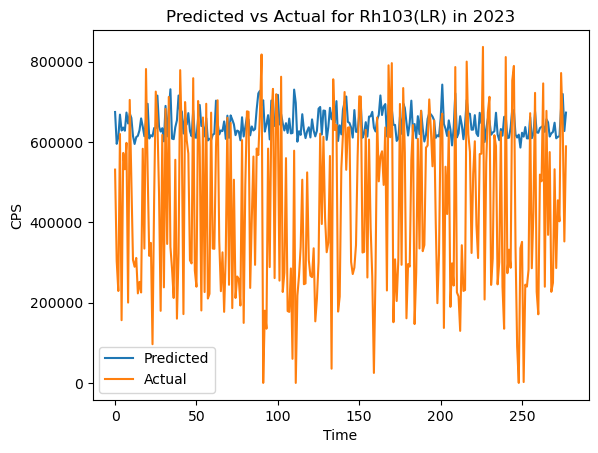

Test Loss for year 2024:  0.023613


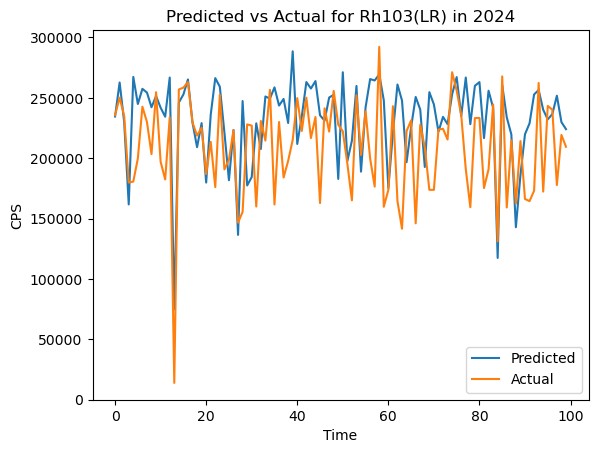

In [10]:
# Define the configuration dictionary
configurations8 = {
    "quantity": 0,                              #quality performance measurement
    "category": "HOT",                          #Options: ["HOT", "COLD"]
    "year": 2024,                               #Specify data year to be used on training
    "all_elements": True,                      #Specify if you want to use all elements or not                              
    "element_name": "Rh103(LR)",                       #Specify the element name if all_elements = False
    "predict_element": "Rh103(LR)",             #Specify the element to be predicted. This should be the same as element_name
    "sequence_length": 5,                       #Sequential length for temporal learning
    "hidden_size": 64,                          #Number of hidden states
    "latent_size": 64,                          #IF VAE, Specify the latent size
    "num_layers": 2,                            #Number of LSTM Layers
    "num_epochs": 50,                          #Number of epochs
    "batch_size": 2,                            #Batch size
    "learning_rate": 1e-3,                      #Learning Rate
    "kld_weight": 0.000025,                    #KLD Weight for LSTMVAE to avoid 0 KLD LOSS
    "train_size": 0.8,                          #Training size as a fraction of the dataset 
    "d_model": 64,                             #Model dimentionality
    "num_heads": 4,                             #Number of heads in the transformer model
    "transformer_num_encoder_layers": 2,        #Number of encoder layers in the transformer model
    "dim_feedforward": 256,                    #Feedforward dimentionality in the transformer model
    "dropout": 0.1,                             #Dropout rate in the transformer model
    "model_type": "Ensemble"                  #Options: ["SimpleLSTM", "LSTMVAE"]
}
train.model_training(configurations8)

# Wandb sweep 
### (Edit the dictionary in src/wand_sweep.py for more hyperparameter search)

In [11]:
import wandb
wandb.login()

#You would need to retrieve your API key from wandb.ai and paste it here when prompted.

True

In [12]:
#Replace directory here
#!python directory/src/wandb_sweep.py

!python C:/Users/sohal/Downloads/CML_Preliminary_Steps-main/CML_Preliminary_Steps-main/src/wandb_sweep.py

Setting seed: 1000000
Create sweep with ID: q7jhvrq9
Sweep URL: https://wandb.ai/ranpo/ICPMS/sweeps/q7jhvrq9
Available years: [2022 2023 2024]
Chosen year: 2022
0      304041.5
1      307914.6
2      302075.3
3      329910.0
4      307945.3
         ...   
177    450535.8
178    506695.3
179    499012.8
180    485700.5
181    519733.2
Name: Rh103(LR)_AVG, Length: 182, dtype: float64
182 torch.Size([182])
Epoch: 1 | Train Loss:  0.147921 | Validation Loss:  0.062253 | Test Loss:  0.055714 |  Learning rate: 0.001
Epoch: 2 | Train Loss:  0.057442 | Validation Loss:  0.015033 | Test Loss:  0.011892 |  Learning rate: 0.001
Epoch: 3 | Train Loss:  0.044106 | Validation Loss:  0.010627 | Test Loss:  0.008182 |  Learning rate: 0.001
Epoch: 4 | Train Loss:  0.032837 | Validation Loss:  0.005174 | Test Loss:  0.003835 |  Learning rate: 0.001
Epoch: 5 | Train Loss:  0.017374 | Validation Loss:  0.006499 | Test Loss:  0.005869 |  Learning rate: 0.001
Epoch: 6 | Train Loss:  0.012752 | Validation L

wandb: Currently logged in as: rgsohal (ranpo). Use `wandb login --relogin` to force relogin
wandb: Agent Starting Run: 126rfdwl with config:
wandb: 	all_elements: False
wandb: 	batch_size: 3
wandb: 	category: HOT
wandb: 	d_model: 64
wandb: 	dim_feedforward: 256
wandb: 	dropout: 0.1
wandb: 	element_name: Rh103(LR)
wandb: 	hidden_size: 64
wandb: 	initial_learning_rate: 0.001
wandb: 	kld_weight: 2.5e-05
wandb: 	latent_size: 8
wandb: 	model_type: SimpleLSTM
wandb: 	num_epochs: 120
wandb: 	num_heads: 8
wandb: 	num_layers: 2
wandb: 	predict_element: Rh(103)
wandb: 	quantity: 0
wandb: 	sequence_length: 2
wandb: 	train_size: 0.8
wandb: 	transformer_num_encoder_layers: 3
wandb: 	year: 2022
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: wandb version 0.17.8 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in c:\Users\sohal\Downloads\CML_Preliminary_Steps-main\